# ID 2214  Programming for data science

## Neural Networks

### Amir Hossein Akhavan Rahnama

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mlp
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_regression
import numpy as np
from sklearn.neural_network import MLPClassifier

In [3]:
seed_number = 1
np.random.seed(seed_number)

### Classification

In [4]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=seed_number, n_clusters_per_class=1)

In [5]:
y = y.reshape(100, 1)

In [6]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hidden_size = 4
result = {}
max_iter = 30000

for alpha in alphas:
    print('Training MLP with learning rate: {}'.format(alpha))
    result[alpha] = mlp.train(X, y, hidden_size, alpha=alpha, num_iter=30000)

Training MLP with learning rate: 0.001
Training MLP with learning rate: 0.01
Training MLP with learning rate: 0.1
Training MLP with learning rate: 1
Training MLP with learning rate: 10
Training MLP with learning rate: 100
Training MLP with learning rate: 1000


/home/amir/code/neural-network-playground/mlp.py:7: RuntimeWarning: overflow encountered in exp
  output = 1/(1+np.exp(-x))


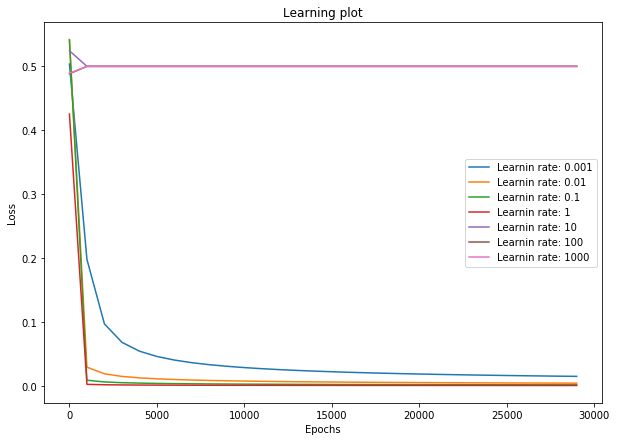

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

_iter = np.arange(0, 30000, 1000)

for alpha in alphas:
    ax.plot(_iter, result[alpha]['loss'], label='Learnin rate: {}'.format(alpha))

ax.legend()

ax.set_title('Learning plot')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

plt.savefig('learning_plot.eps', format='eps')

plt.show()

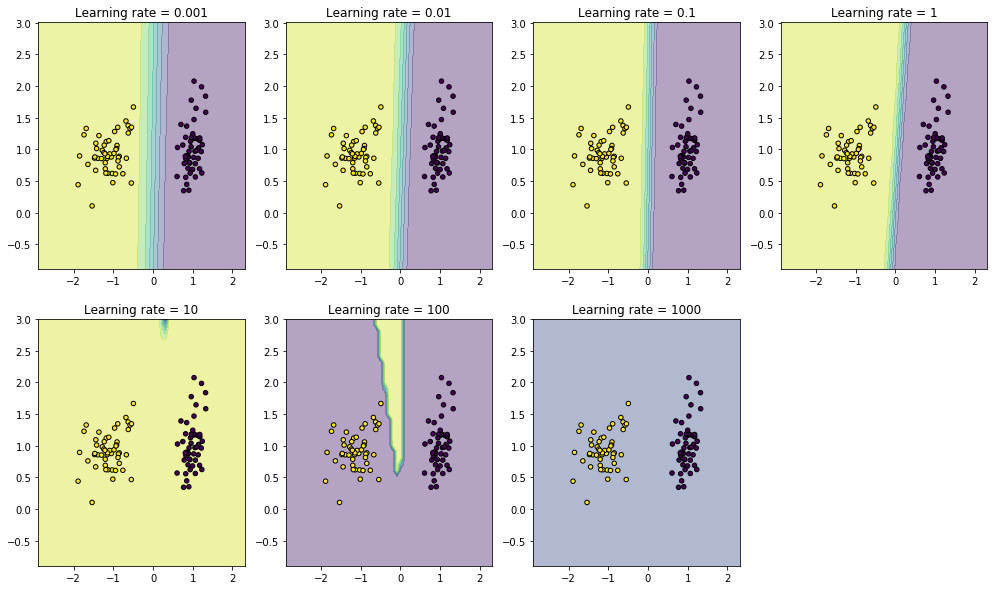

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(17, 10))
ax = ax.ravel()
i = 0

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
decision_plate = np.c_[xx.ravel(), yy.ravel()]

for alpha in alphas:
    _, Z = mlp.forward_propagation(decision_plate, result[alpha]['w_0'], result[alpha]['w_1'])
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
    ax[i].set_title('Learning rate = {}'.format(alpha))

    i += 1

ax[7].axis('off')
plt.savefig('np_implementation.png', dpi=600, format='png')
plt.show()

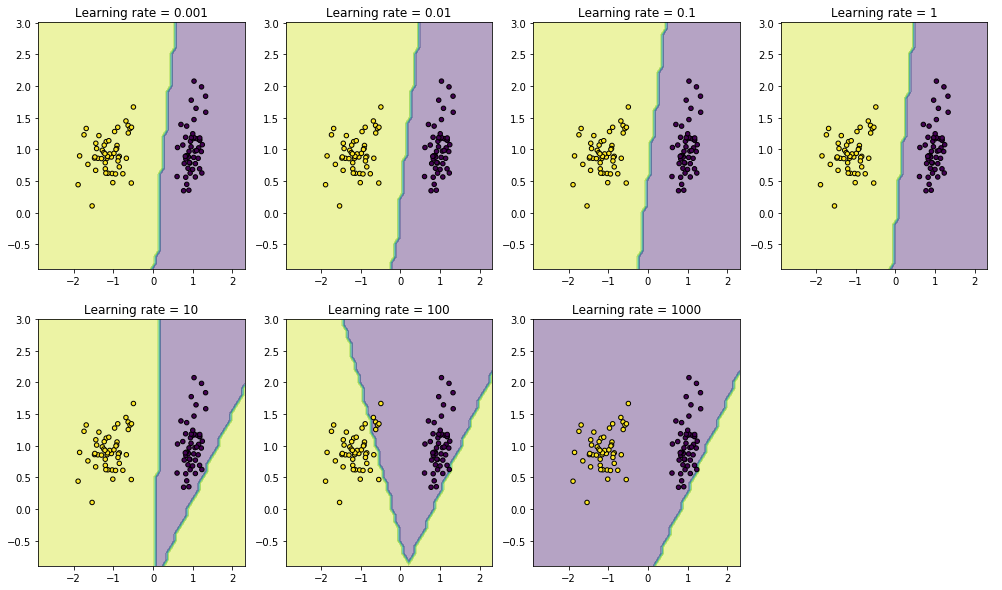

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(17, 10))
ax = ax.ravel()
i = 0

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
decision_plate = np.c_[xx.ravel(), yy.ravel()]

for alpha in alphas:
    clf = MLPClassifier(learning_rate_init=alpha, solver='sgd', alpha=0,
                    hidden_layer_sizes=(hidden_size,), random_state=1, max_iter=30000, batch_size=X.shape[0])
    clf.fit(X, y.ravel())
    Z = clf.predict(decision_plate)
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
    ax[i].set_title('Learning rate = {}'.format(alpha))

    i += 1

ax[7].axis('off')
plt.savefig('sklearn.png', dpi=600, format='png')

plt.show()

### Regression

In [10]:
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(20))

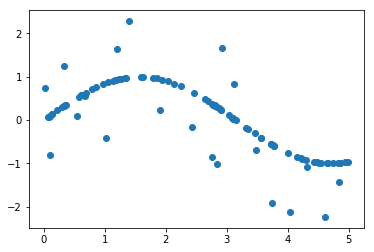

In [11]:
plt.scatter(X,y)
plt.show()

In [12]:
y = y.reshape(100, 1)

In [13]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hidden_size = 10
result = {}
max_iter = 30000

for alpha in alphas:
    print('Training MLP with learning rate: {}'.format(alpha))
    result[alpha] = mlp.train(X, y, hidden_size, alpha=alpha, num_iter=30000)

Training MLP with learning rate: 0.001
Training MLP with learning rate: 0.01
Training MLP with learning rate: 0.1
Training MLP with learning rate: 1
Training MLP with learning rate: 10
Training MLP with learning rate: 100


/home/amir/code/neural-network-playground/mlp.py:7: RuntimeWarning: overflow encountered in exp
  output = 1/(1+np.exp(-x))


Training MLP with learning rate: 1000


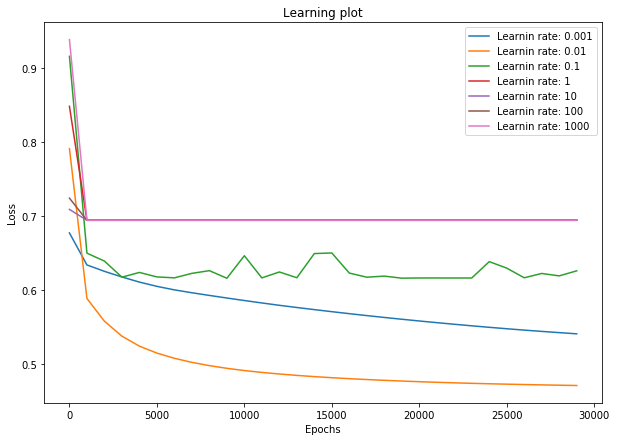

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

_iter = np.arange(0, 30000, 1000)

for alpha in alphas:
    ax.plot(_iter, result[alpha]['loss'], label='Learnin rate: {}'.format(alpha))

ax.legend()

ax.set_title('Learning plot')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

plt.savefig('learning_plot.eps', format='eps')

plt.show()

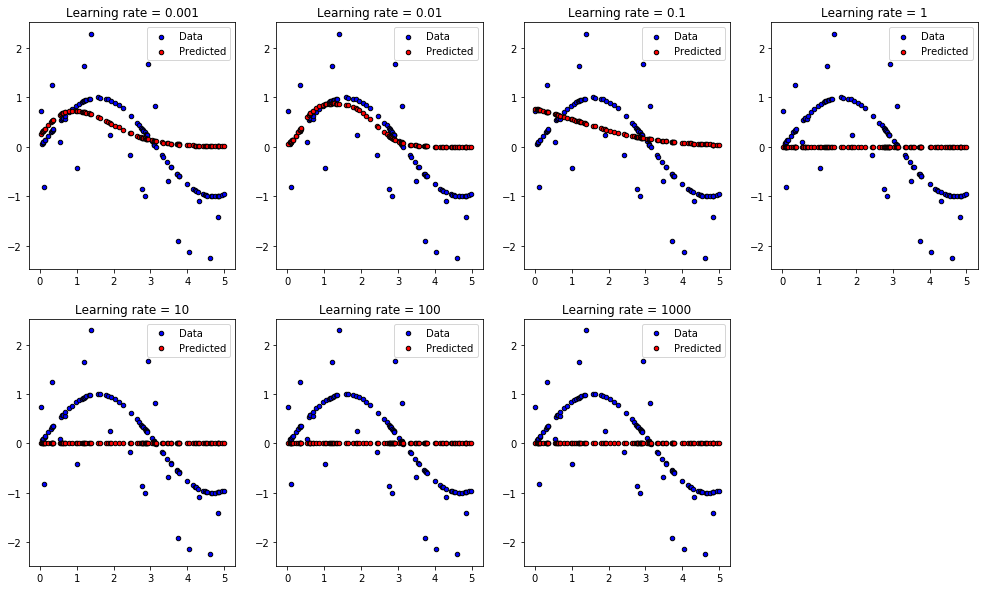

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(17, 10))
ax = ax.ravel()
i = 0

for alpha in alphas:
    _, Z = mlp.forward_propagation(X, result[alpha]['w_0'], result[alpha]['w_1'])
    
    ax[i].scatter(X, y, s=20, c='blue', label='Data', edgecolor='k')
    ax[i].scatter(X, Z, s=20, c='red', label='Predicted', edgecolor='k')
    ax[i].set_title('Learning rate = {}'.format(alpha))
    ax[i].legend()
    i += 1

ax[7].axis('off')
plt.savefig('np_implementation_regression.png', dpi=600, format='png')
plt.show()

### Universal approximation thoerem: an example

In [16]:
X, y = make_circles(noise=0.5, factor=0.6, random_state=1)

In [17]:
y = y.reshape(100, 1)

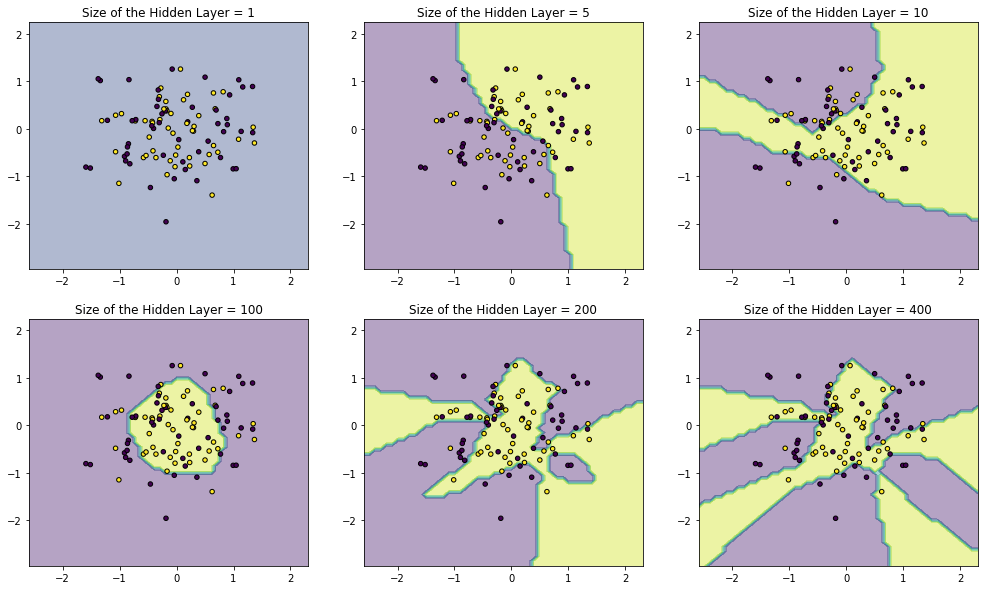

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
ax = ax.ravel()
i = 0

hidden_layers = [1, 5, 10, 100, 200, 400]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
decision_plate = np.c_[xx.ravel(), yy.ravel()]

for h_size in hidden_layers:
    clf = MLPClassifier(
                    hidden_layer_sizes=(h_size,), random_state=1, max_iter=30000)
    clf.fit(X, y.ravel())
    Z = clf.predict(decision_plate)
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[:, 0], X[:, 1], c=y.flatten(), s=20, edgecolor='k')
    ax[i].set_title('Size of the Hidden Layer = {}'.format(h_size))

    i += 1

plt.savefig('role_of_units.png', dpi=600, format='png')

plt.show()

### Regularization (Dropout)

In [9]:
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(20))
y = y.reshape(100,1)

In [10]:
hidden_size = 10
result = {}
alpha=0.01
hidden_size=10
max_iter = 30000
dropout_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

for dr_rate in dropout_rate:
    print('Training MLP with dropout rate: {}'.format(dr_rate))
    result[dr_rate] = mlp.train(X, y, hidden_size, alpha=alpha, num_iter=30000, dropout_rate=dr_rate)

Training MLP with dropout rate: 0
Training MLP with dropout rate: 0.1
Training MLP with dropout rate: 0.2
Training MLP with dropout rate: 0.3
Training MLP with dropout rate: 0.4
Training MLP with dropout rate: 0.5


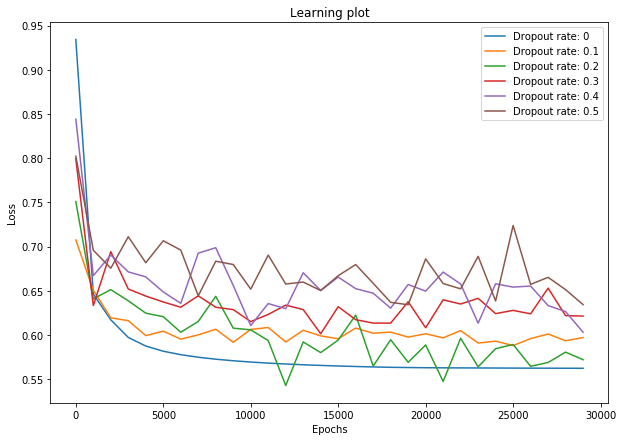

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

_iter = np.arange(0, 30000, 1000)

for dr_rate in dropout_rate:
    ax.plot(_iter, result[dr_rate]['loss'], label='Dropout rate: {}'.format(dr_rate))

ax.legend()

ax.set_title('Learning plot')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

plt.savefig('learning_plot_dropout.eps', format='eps')

plt.show()

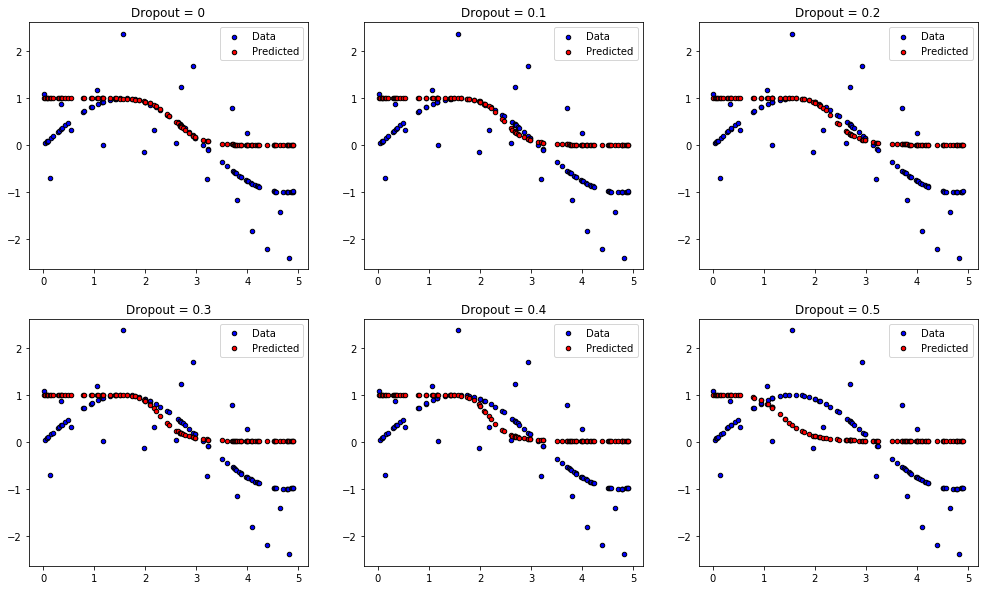

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
ax = ax.ravel()
i = 0

for dr_rate in dropout_rate:
    result = mlp.train(X, y, hidden_size, alpha=alpha, num_iter=30000, dropout_rate=dr_rate)
    _, Z = mlp.forward_propagation(X, result['w_0'], result['w_1'])
    
    ax[i].scatter(X, y, s=20, c='blue', label='Data', edgecolor='k')
    ax[i].scatter(X, Z, s=20, c='red', label='Predicted', edgecolor='k')
    ax[i].set_title('Dropout = {}'.format(dr_rate))
    ax[i].legend()
    i += 1

plt.savefig('dropout_regression.png', dpi=600, format='png')
plt.show()